In [1]:
#!pip install quandl yfinance plotly dbnomics

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import date as dt

from dbnomics import fetch_series
import quandl
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

In [42]:
#Pegar os dados da ação itausa
raisen = yf.Ticker("RAIZ4.SA")

In [43]:
type(raisen)

yfinance.ticker.Ticker

In [44]:
raisen.info

{'address1': 'Avenida Almirante Barroso, 81',
 'address2': '36th Floor Room 32B109',
 'city': 'Rio De Janeiro',
 'state': 'RJ',
 'zip': '20031-004',
 'country': 'Brazil',
 'website': 'https://www.raizen.com.br',
 'industry': 'Utilities—Renewable',
 'industryDisp': 'Utilities—Renewable',
 'sector': 'Utilities',
 'longBusinessSummary': 'Raízen S.A. operates as an integrated energy company in Brazil, Argentina, Paraguay, rest of Latin America, North America, Asia, Europe, and internationally. It operates in three segments: Marketing and Services, Sugar, and Renewable. The Marketing and Services segment trades in and sells fossil and renewable fuels through a franchised network of service stations under the Shell brand. Its Sugar segment engages in the origination, production, sale, and trading of sugar. The Renewable segment originates, produces, sells, and trades in ethanol; produces and sells bioenergy; resells and trades in electric power; and produces and sells solar energy and biogas

In [45]:
raisen = raisen.history(period = 'max')

In [46]:
#Verificar o index
raisen.index

DatetimeIndex(['2021-08-05 00:00:00-03:00', '2021-08-06 00:00:00-03:00',
               '2021-08-09 00:00:00-03:00', '2021-08-10 00:00:00-03:00',
               '2021-08-11 00:00:00-03:00', '2021-08-12 00:00:00-03:00',
               '2021-08-13 00:00:00-03:00', '2021-08-16 00:00:00-03:00',
               '2021-08-17 00:00:00-03:00', '2021-08-18 00:00:00-03:00',
               ...
               '2023-06-12 00:00:00-03:00', '2023-06-13 00:00:00-03:00',
               '2023-06-14 00:00:00-03:00', '2023-06-15 00:00:00-03:00',
               '2023-06-16 00:00:00-03:00', '2023-06-19 00:00:00-03:00',
               '2023-06-20 00:00:00-03:00', '2023-06-21 00:00:00-03:00',
               '2023-06-22 00:00:00-03:00', '2023-06-23 00:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', name='Date', length=470, freq=None)

In [47]:
#Pegar a série de dados por determinado período
raisen.loc['2018-1-1':]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-08-05 00:00:00-03:00,6.934037,7.045278,6.655933,6.711554,98849900,0.0,0.0
2021-08-06 00:00:00-03:00,6.720824,6.813525,6.516882,6.581772,28799900,0.0,0.0
2021-08-09 00:00:00-03:00,6.655933,6.776444,6.553962,6.553962,14491100,0.0,0.0
2021-08-10 00:00:00-03:00,6.600313,6.637393,6.535422,6.581772,9988600,0.0,0.0
2021-08-11 00:00:00-03:00,6.609583,6.618853,6.303669,6.368560,31978000,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-19 00:00:00-03:00,3.980000,4.010000,3.930000,3.970000,9550900,0.0,0.0
2023-06-20 00:00:00-03:00,3.980000,4.170000,3.960000,4.150000,35176100,0.0,0.0
2023-06-21 00:00:00-03:00,4.170000,4.250000,4.100000,4.230000,23935400,0.0,0.0


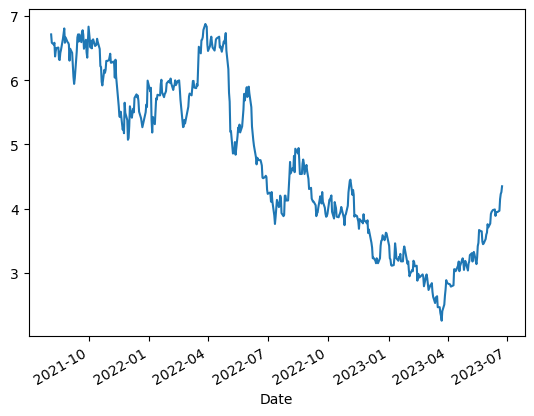

In [48]:
raisen.Close.plot();

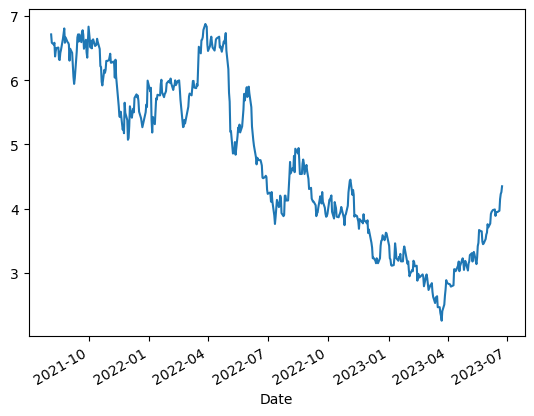

In [49]:
raisen.loc['2018-1-1':].Close.plot();

In [50]:
#Pegar pela média os dados
raisen.resample('m').mean()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-08-31 00:00:00-03:00,6.582748,6.669595,6.441257,6.546156,1.635666e+07,0.000000,0.0
2021-09-30 00:00:00-03:00,6.508495,6.623709,6.368119,6.486865,7.752762e+06,0.000000,0.0
2021-10-31 00:00:00-03:00,6.420288,6.522452,6.275391,6.392900,1.249735e+07,0.000812,0.0
2021-11-30 00:00:00-03:00,5.832126,5.959416,5.641191,5.772662,1.131262e+07,0.000000,0.0
2021-12-31 00:00:00-03:00,5.491137,5.626524,5.380526,5.531841,1.057726e+07,0.000000,0.0
2022-01-31 00:00:00-03:00,5.703416,5.843732,5.606286,5.718172,8.379771e+06,0.001048,0.0
2022-02-28 00:00:00-03:00,5.832145,5.912159,5.678009,5.772258,1.017770e+07,0.000000,0.0
2022-03-31 00:00:00-03:00,6.176832,6.343018,6.083989,6.240848,1.171892e+07,0.000000,0.0
2022-04-30 00:00:00-03:00,6.564081,6.659144,6.434092,6.569500,1.055407e+07,0.001461,0.0


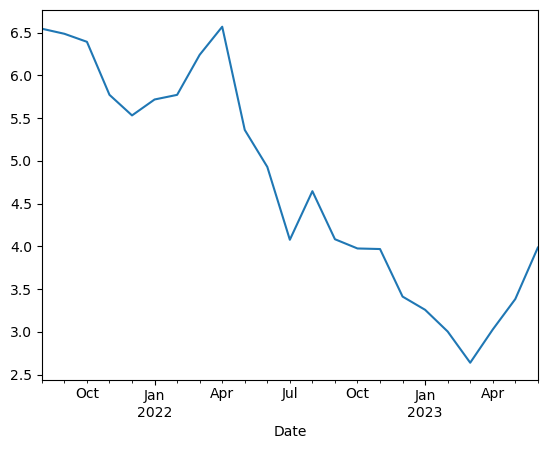

In [51]:
#Pegar pela média do preço de fechamento no mês
raisen.resample('m').mean().Close.plot();

Text(0.5, 0, 'Período')

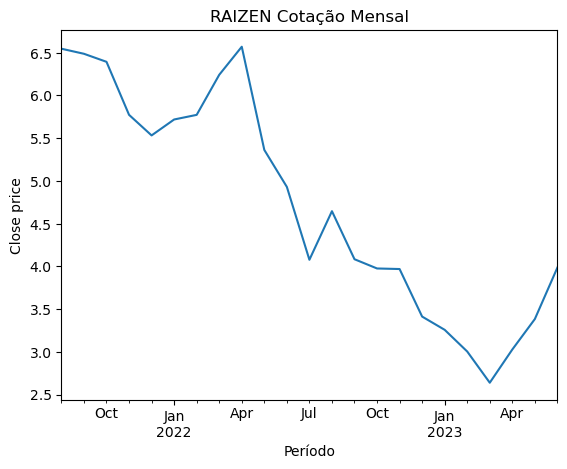

In [52]:
#Pegar pela média do preço de fechamento no mês a partir de determinado período
raisen.resample('m').mean().loc['2018-1-1':, 'Close'].plot()
plt.title('RAIZEN Cotação Mensal')
plt.ylabel('Close price')
plt.xlabel('Período')

In [54]:
#Cotação das ações da OIBR3
oi = yf.Ticker("OIBR3.SA")

In [55]:
#Pegando o período máximo de cotação da ação
oi = oi.history(period = 'max')

In [56]:
#Verificando os dados importados no DataFrame
oi

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-06-06 00:00:00-03:00,479.260140,563.835477,479.260140,563.271606,0,0.0,0.0
2002-06-07 00:00:00-03:00,541.281989,552.558716,541.281989,552.558716,0,0.0,0.0
2002-06-10 00:00:00-03:00,535.643714,563.835510,535.643714,563.835510,0,0.0,0.0
2002-06-11 00:00:00-03:00,563.271615,563.271615,546.920418,551.994934,0,0.0,0.0
2002-06-12 00:00:00-03:00,544.101179,546.920349,535.643623,546.920349,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-19 00:00:00-03:00,1.030000,1.050000,1.030000,1.040000,3935500,0.0,0.0
2023-06-20 00:00:00-03:00,1.040000,1.090000,1.040000,1.070000,19857500,0.0,0.0
2023-06-21 00:00:00-03:00,1.080000,1.240000,1.070000,1.190000,53623900,0.0,0.0


In [57]:
#Verificando o tipo de objeto retornado
type(oi)

pandas.core.frame.DataFrame

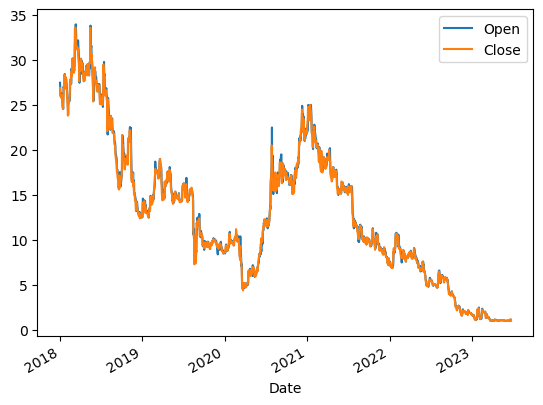

In [58]:
oi.loc['2018-1-1':, ['Open', 'Close']].plot();

In [ ]:
#Cria um objeto Ticker
#dólar: USDBRL = X
#BTC: BTC-USD
# ^BVSP

petr = yf.Ticker('PETR4  .SA')

In [60]:
#Pegando os dados em dólar do BTC
btc = yf.Ticker('BTC-USD')
btc = btc.history(period = 'max')

<Axes: xlabel='Date'>

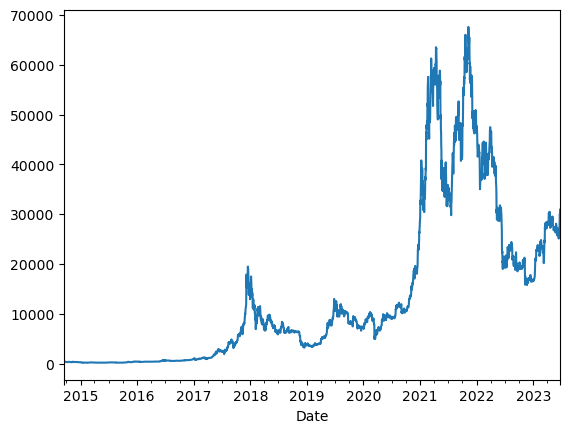

In [61]:
#Plotando o gráfico do BTC
btc.Close.plot()

In [143]:
#Pegar dados históricos do Bitcoin em dólar
btc = yf.Ticker('BTC-USD')
btc = btc.history(period = 'max')

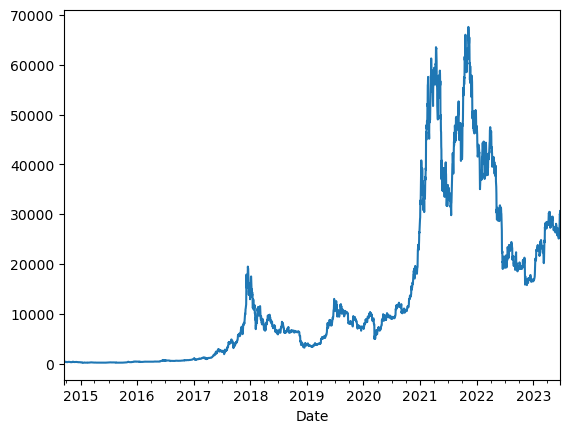

In [144]:
#Plotar gráfico do Bitcoin
btc.Close.plot();

In [149]:
#Pegar cotação do dólar pela moeda brasileira
dolar = yf.Ticker('USDBRL=X')
dolar = dolar.history(period = 'max')

In [150]:
dolar

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-01 00:00:00+00:00,2.9460,2.9460,2.923000,2.9230,0,0.0,0.0
2003-12-02 00:00:00+00:00,2.9230,2.9310,2.923000,2.9310,0,0.0,0.0
2003-12-03 00:00:00+00:00,2.9310,2.9360,2.926000,2.9310,0,0.0,0.0
2003-12-04 00:00:00+00:00,2.9310,2.9430,2.931000,2.9430,0,0.0,0.0
2003-12-05 00:00:00+00:00,2.9430,2.9480,2.934000,2.9340,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-19 00:00:00+01:00,4.8070,4.8273,4.766300,4.8070,0,0.0,0.0
2023-06-20 00:00:00+01:00,4.7769,4.7976,4.772200,4.7769,0,0.0,0.0
2023-06-21 00:00:00+01:00,4.7893,4.8145,4.763200,4.7893,0,0.0,0.0


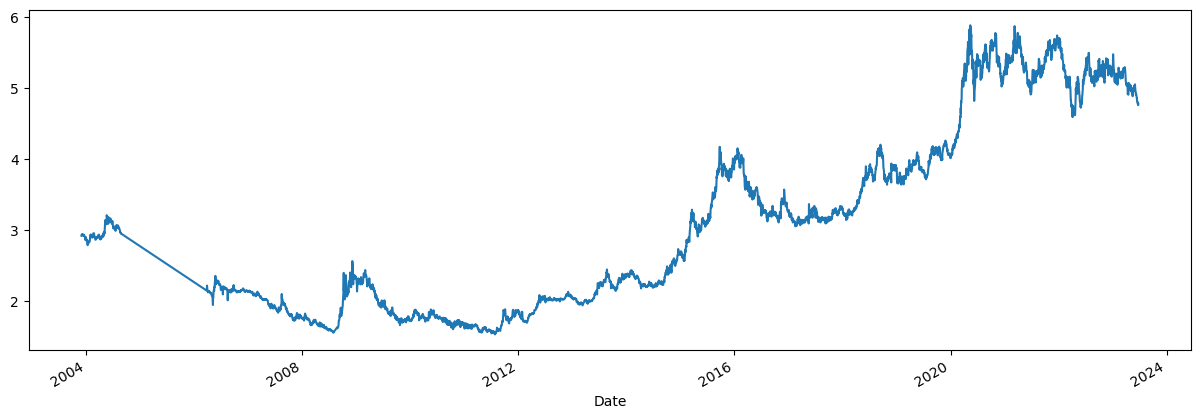

In [152]:
#Plotar gráfico do dólar
dolar.Close.plot(figsize = (15,5));

In [134]:
#Pegando as cotações do BOVESPA
#Obs: precisa atribuir o valor da variável bvsp para receber o Dataframe
bvsp = yf.Ticker('^BVSP')
bvsp = bvsp.history(period = 'max')

In [135]:
#Outra maneira de escrever o mesmo código
#bvsp = yf.Ticker('^BVSP').history(period = 'max')

<Axes: xlabel='Date'>

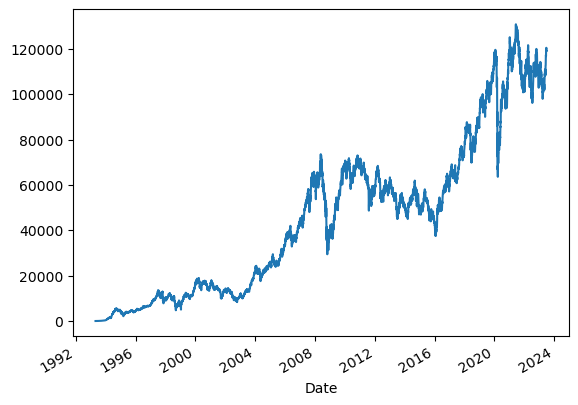

In [136]:
#bvsp_close.loc['2020-1-1':,].plot();
bvsp.Close.plot()

<Axes: xlabel='Date'>

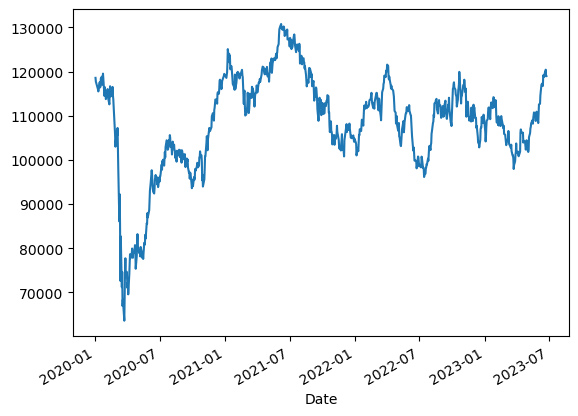

In [139]:
#Verificando os dados de 2018 até o período atual
#bvsp.Close.loc['2018-01-01':].plot()
bvsp.loc['2020-01-01':, 'Close'].plot()

<Axes: xlabel='Date'>

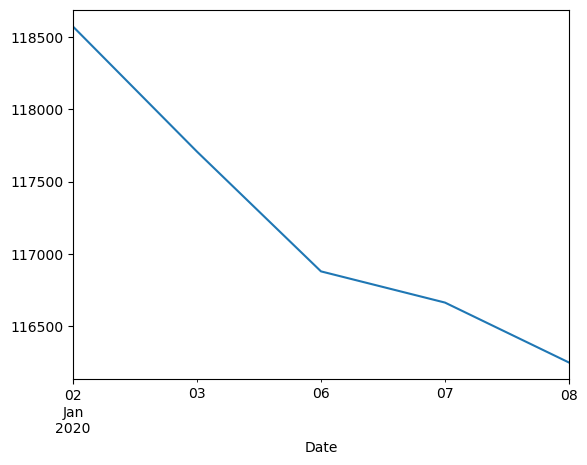

In [72]:
bvsp.plot()